In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import os

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [5]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [6]:
def create_enhanced_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax') 
    ])
    return model

In [7]:
model = create_enhanced_model()
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

d:\Python Project\Handwriting Recognition Application\Test 02\Handwriting Recognition Application II\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,57

 Total params: 538,730 (2.06 MB)

 Trainable params: 537,066 (2.05 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [8]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5),
    keras.callbacks.ModelCheckpoint(
        'models/best_handwriting_model.h5',
        save_best_only=True,
        monitor='val_accuracy'
    )
]

In [9]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

In [10]:
history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=128),
    epochs=100,
    validation_data=(x_test, y_test_cat),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.6337 - loss: 1.2958

469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 272ms/step - accuracy: 0.8082 - loss: 0.6480 - val_accuracy: 0.8967 - val_loss: 0.3404 - learning_rate: 0.0010
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.9432 - loss: 0.1921

469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 267ms/step - accuracy: 0.9520 - loss: 0.1650 - val_accuracy: 0.9807 - val_loss: 0.0623 - learning_rate: 0.0010
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9643 - loss: 0.1230

469/469 ━━━━━━━━━━━━━━━━━━━━ 129s 276ms/step - accuracy: 0.9664 - loss: 0.1160 - val_accuracy: 0.9876 - val_loss: 0.0401 - learning_rate: 0.0010
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.9716 - loss: 0.0969

469/469 ━━━━━━━━━━━━━━━━━━━━ 127s 270ms/step - accuracy: 0.9723 - loss: 0.0949 - val_accuracy: 0.9888 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9766 - loss: 0.0833

469/469 ━━━━━━━━━━━━━━━━━━━━ 179s 349ms/step - accuracy: 0.9772 - loss: 0.0802 - val_accuracy: 0.9926 - val_loss: 0.0249 - learning_rate: 0.0010
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.9799 - loss: 0.0727

469/469 ━━━━━━━━━━━━━━━━━━━━ 178s 376ms/step - accuracy: 0.9799 - loss: 0.0726 - val_accuracy: 0.9932 - val_loss: 0.0199 - learning_rate: 0.0010
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 162s 346ms/step - accuracy: 0.9802 - loss: 0.0693 - val_accuracy: 0.9928 - val_loss: 0.0217 - learning_rate: 0.0010
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 303ms/step - accuracy: 0.9818 - loss: 0.0618 - val_accuracy: 0.9931 - val_loss: 0.0204 - learning_rate: 0.0010
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 233ms/step - accuracy: 0.9825 - loss: 0.0592 - val_accuracy: 0.9920 - val_loss: 0.0263 - learning_rate: 0.0010
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9844 - loss: 0.0567

469/469 ━━━━━━━━━━━━━━━━━━━━ 110s 234ms/step - accuracy: 0.9836 - loss: 0.0585 - val_accuracy: 0.9939 - val_loss: 0.0218 - learning_rate: 0.0010
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 110s 235ms/step - accuracy: 0.9845 - loss: 0.0557 - val_accuracy: 0.9935 - val_loss: 0.0217 - learning_rate: 0.0010
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9880 - loss: 0.0436

469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 230ms/step - accuracy: 0.9878 - loss: 0.0436 - val_accuracy: 0.9944 - val_loss: 0.0168 - learning_rate: 5.0000e-04
Epoch 13/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9888 - loss: 0.0363

469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 233ms/step - accuracy: 0.9891 - loss: 0.0370 - val_accuracy: 0.9952 - val_loss: 0.0142 - learning_rate: 5.0000e-04
Epoch 14/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 232ms/step - accuracy: 0.9893 - loss: 0.0379 - val_accuracy: 0.9952 - val_loss: 0.0160 - learning_rate: 5.0000e-04
Epoch 15/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9894 - loss: 0.0352

469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 232ms/step - accuracy: 0.9891 - loss: 0.0376 - val_accuracy: 0.9953 - val_loss: 0.0158 - learning_rate: 5.0000e-04
Epoch 16/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.9891 - loss: 0.0371

469/469 ━━━━━━━━━━━━━━━━━━━━ 110s 234ms/step - accuracy: 0.9894 - loss: 0.0363 - val_accuracy: 0.9954 - val_loss: 0.0137 - learning_rate: 5.0000e-04
Epoch 17/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 107s 229ms/step - accuracy: 0.9902 - loss: 0.0342 - val_accuracy: 0.9952 - val_loss: 0.0138 - learning_rate: 5.0000e-04
Epoch 18/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 231ms/step - accuracy: 0.9902 - loss: 0.0342 - val_accuracy: 0.9952 - val_loss: 0.0135 - learning_rate: 5.0000e-04
Epoch 19/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9902 - loss: 0.0333

469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 231ms/step - accuracy: 0.9906 - loss: 0.0332 - val_accuracy: 0.9957 - val_loss: 0.0123 - learning_rate: 5.0000e-04
Epoch 20/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 232ms/step - accuracy: 0.9904 - loss: 0.0332 - val_accuracy: 0.9939 - val_loss: 0.0166 - learning_rate: 5.0000e-04
Epoch 21/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 107s 229ms/step - accuracy: 0.9906 - loss: 0.0321 - val_accuracy: 0.9953 - val_loss: 0.0144 - learning_rate: 5.0000e-04
Epoch 22/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9911 - loss: 0.0304

469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 231ms/step - accuracy: 0.9907 - loss: 0.0326 - val_accuracy: 0.9959 - val_loss: 0.0136 - learning_rate: 5.0000e-04
Epoch 23/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9923 - loss: 0.0278

469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 237ms/step - accuracy: 0.9918 - loss: 0.0292 - val_accuracy: 0.9961 - val_loss: 0.0129 - learning_rate: 5.0000e-04
Epoch 24/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 231ms/step - accuracy: 0.9915 - loss: 0.0299 - val_accuracy: 0.9952 - val_loss: 0.0148 - learning_rate: 5.0000e-04
Epoch 25/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 233ms/step - accuracy: 0.9926 - loss: 0.0263 - val_accuracy: 0.9948 - val_loss: 0.0145 - learning_rate: 2.5000e-04
Epoch 26/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 232ms/step - accuracy: 0.9927 - loss: 0.0247 - val_accuracy: 0.9961 - val_loss: 0.0100 - learning_rate: 2.5000e-04
Epoch 27/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9929 - loss: 0.0237

469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 232ms/step - accuracy: 0.9930 - loss: 0.0237 - val_accuracy: 0.9964 - val_loss: 0.0105 - learning_rate: 2.5000e-04
Epoch 28/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 232ms/step - accuracy: 0.9934 - loss: 0.0227 - val_accuracy: 0.9961 - val_loss: 0.0112 - learning_rate: 2.5000e-04
Epoch 29/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 110s 235ms/step - accuracy: 0.9932 - loss: 0.0226 - val_accuracy: 0.9962 - val_loss: 0.0118 - learning_rate: 2.5000e-04
Epoch 30/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 242ms/step - accuracy: 0.9937 - loss: 0.0224 - val_accuracy: 0.9964 - val_loss: 0.0117 - learning_rate: 2.5000e-04
Epoch 31/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 117s 249ms/step - accuracy: 0.9940 - loss: 0.0208 - val_accuracy: 0.9963 - val_loss: 0.0123 - learning_rate: 2.5000e-04
Epoch 32/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9939 - loss: 0.0218

469/469 ━━━━━━━━━━━━━━━━━━━━ 112s 237ms/step - accuracy: 0.9943 - loss: 0.0197 - val_accuracy: 0.9968 - val_loss: 0.0097 - learning_rate: 1.2500e-04
Epoch 33/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 112s 239ms/step - accuracy: 0.9944 - loss: 0.0196 - val_accuracy: 0.9962 - val_loss: 0.0111 - learning_rate: 1.2500e-04
Epoch 34/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 244ms/step - accuracy: 0.9941 - loss: 0.0207 - val_accuracy: 0.9966 - val_loss: 0.0107 - learning_rate: 1.2500e-04
Epoch 35/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 236ms/step - accuracy: 0.9941 - loss: 0.0200 - val_accuracy: 0.9964 - val_loss: 0.0100 - learning_rate: 1.2500e-04
Epoch 36/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.9951 - loss: 0.0163

469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 243ms/step - accuracy: 0.9947 - loss: 0.0183 - val_accuracy: 0.9969 - val_loss: 0.0102 - learning_rate: 1.2500e-04
Epoch 37/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 112s 238ms/step - accuracy: 0.9946 - loss: 0.0181 - val_accuracy: 0.9959 - val_loss: 0.0106 - learning_rate: 1.2500e-04
Epoch 38/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 112s 239ms/step - accuracy: 0.9951 - loss: 0.0168 - val_accuracy: 0.9963 - val_loss: 0.0106 - learning_rate: 6.2500e-05
Epoch 39/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 112s 239ms/step - accuracy: 0.9947 - loss: 0.0175 - val_accuracy: 0.9960 - val_loss: 0.0109 - learning_rate: 6.2500e-05
Epoch 40/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 233ms/step - accuracy: 0.9952 - loss: 0.0167 - val_accuracy: 0.9969 - val_loss: 0.0104 - learning_rate: 6.2500e-05
Epoch 41/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 110s 234ms/step - accuracy: 0.9950 - loss: 0.0174 - val_accuracy: 0.9962 - val_loss: 0.0112 - learning_rate: 6.2500e-05
Epoch 42/100
469/469 ━━━━━━━━━━━━━━━━━━━━

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9968
Test Loss: 0.0097


In [12]:
model.save('models/handwriting_model.h5')
print("Model saved successfully!")

Model saved successfully!


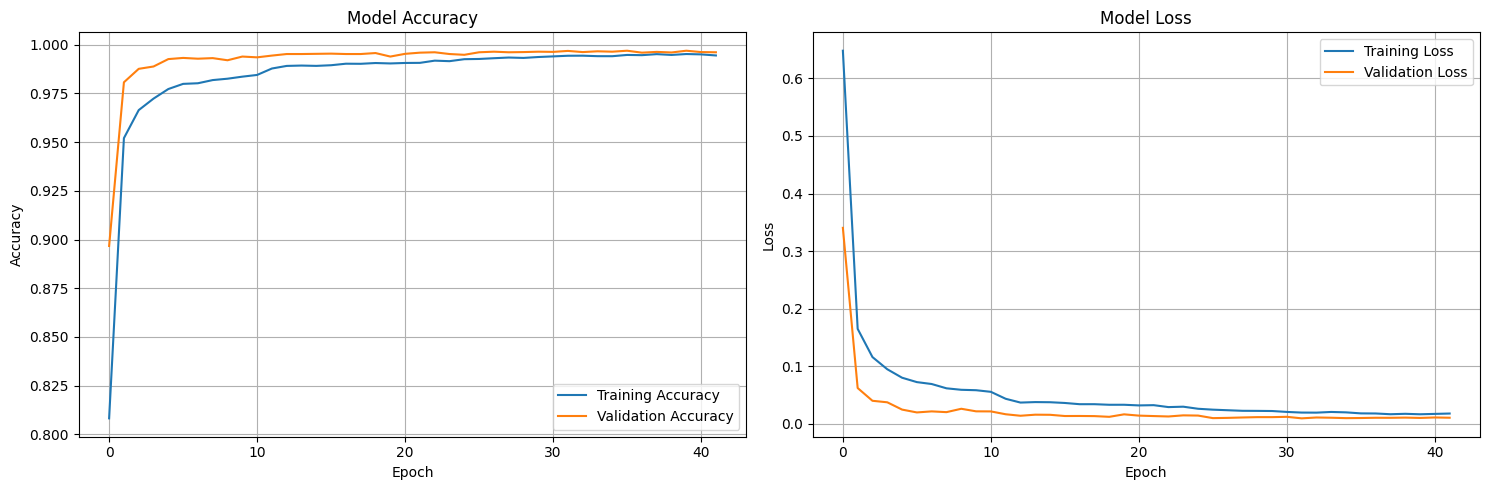

In [13]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)